# Tool for Statistical Testing

This tool shows how we can apply a statistical test on two independent or two paired samples and is subdivided into the following parts:
- [Parameters](#Parameters): Parameter for the test that need to be specified (filenames, variable names, alternative).
- [Importing the Data](#Importing-the-Data): Here the needed data are imported.
- [Tests: Preliminary Code](#Tests:-Preliminary-Code): Code that need to be run before executing the statistical tests.
- [Tests for paired samples](#Tests-for-paired-samples): Use this section if your data are paired.
- [Tests for independent samples](#Tests-for-independent-samples): Use this section if your data are independent.


**General setting**

Given two methods (algorithms) **A** and **B** we have the **null hypothesis** $H_0$:

$H_0: \theta_A = \theta_B$

Here $\theta$ denotes the ground truth of a property (e.g. the expected run time or expected objective function value) of the algorithms **A** and **B**.

The **alternative hypothesis** $H_1$ depends on whether we want to apply a **two-sided** or **one-sided** test.

- **two-sided test**: Is there a statistically signifcant **difference** between **A** and **B** (e.g. **A** leads to smaller *or* greater objective function values)?
  - $H_1: \theta_A \neq \theta_B$ (```alternative = "two-sided"```)

- **one-sided test**: Does **A** or **A** lead to **better** results (e.g. smaller objective function values in minimization problems)?
  - $H_1: \theta_A > \theta_B$ (```alternative = "greater"```)
  - $H_1: \theta_A < \theta_B$ (```alternative = "less"```)


**Provided tests for two paired samples**

Two samples are **paired** (also called **related**), if the runtimes or objective function values of **A** and **B** are determined on the **same** instances.
In this case we have $n$ pairs of measurements for both algorithms.
This tool provides two statistical **tests for two paired samples**:
- **t-Test**: Applicable, if the difference of both samples is (approximately) normally distributed. Also applicable, if the sample size $n$ is large enough ($n \geq 30$) **and** the distribution is not too skewed **and** the sample (the difference) do not contain outliers.
- **Wilcoxon-Test**: Alternative, if the assumptions of the t-Test are not fulfilled.


**Provided tests for two independent samples**

Two samples are independent, if the runtimes or objective function values of **A** and **B** are determined on **different** instances. This tool provides two statistical **tests for two independent samples**:
- **t-Test**: Applicable, if the data of both samples are (approximately) normally distributed. Also applicable, if the sample size of both samples $n_A$ and $n_B$ are large enough ($n_A \geq 30$ and $n_B \geq 30$) **and** the distribution is not too skewed **and** the samples do not contain outliers. $n_A$ and $n_B$ should be (approximately) equal.
- **Wilcoxon-Test (U-Test)**: Alternative, if the assumptions of the t-Test are not fulfilled.

## Parameters

Parameters for **data import**:
- ```file_A```: Path to the file, where the results of algorithm **A** can be found.
- ```file_B```: Path to the file, where the results of algorithm **B** can be found. The results of **A** and **B** can also be contained in the same file.
- ```name_a```: Name of the column, where the results of algorithm **A** can be found.
- ```name_b```: Name of the column, where the results of algorithm **B** can be found.

Parameters for the **tests**:
- ```alternative```: Which alternative $H_1$ should be tested? ```"two-sided"```, ```"greater"``` or ```"less"``` (see above)
- ```alpha```: level of significance (usually $0.05$)

In [43]:
# Parameters for data import to be set
file_A = "aco/stat_aco.csv"
file_B = "ga/stat_ga.csv"

# Parameters for the tests to be set
alternative = "two-sided"
alpha = 0.05

## Importing the Data

It is assumed that the data are given in **csv-format**.
Columns are separeted by a **semicolon** ```;``` and the first row contains the **names of the variables**. Furthermore it is assumed that for decimal numbers the **decimal point** ```.``` is used.

The following example is based on ```Daten.csv``` (see TUWEL), where the results of **A** and **B** are given in the same file.
It is assumed, that this file lies in the subfolder ```data``` of this notebook.

In [2]:
# Importing the data
import pandas as pd
df_A = pd.read_csv(file_A, sep = ",")
df_B = pd.read_csv(file_B, sep = ",")

In [3]:
df_A

,type,saw_policy,population_size,random_k,alpha,beta,rho,p,local_information,min_max_ant_system,termination_criterion,iteration,instance,starting-time,fitness
0,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1,1,0.24,0.25,objective_value,True,400,0,test,20230103:12:30:55,[1501093.4;1501093.4;1501093.4;1501093.4;15010...
1,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1,1,0.24,0.25,objective_value,True,400,1,rc101_1,20230103:12:31:34,[221123730.1;221123730.1;221123730.1;221123730...
2,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1,1,0.24,0.25,objective_value,True,400,2,pr8_1,20230103:12:32:49,[3155159487.442;3155159487.442;3155159487.442;...
3,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1,1,0.24,0.25,objective_value,True,400,3,pr8_2,20230103:12:39:11,[20101722379.72;20101722379.72;20101722379.72;...
4,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1,1,0.24,0.25,objective_value,True,400,4,berlin52_1,20230103:12:41:23,[27193437260.536583;27193437260.536583;2719343...
5,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1,1,0.24,0.25,objective_value,True,400,5,rc101_2,20230103:12:45:52,[4837484482.0;4837484482.0;4837484482.0;483748...
6,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1,1,0.24,0.25,objective_value,True,400,6,a280_1,20230103:13:00:09,[29220838636.87767;29220838636.87767;292208386...


In [4]:
data = df_A

## Preprocess the results

In [28]:
def convert_fitnesses_to_df(data):
    instances = list(data["instance"])
    instances.sort() # Just to be safe
    instances = set(instances)
    new_df = pd.DataFrame([])
    for instance in instances:
        row = (data[data["instance"] == instance]).iloc[0]

        fitness_str = (row["fitness"][1:len(list(row["fitness"])) - 1])
        fitness_list = list(map(float, fitness_str.split(';')))
        fitness_list.sort()          

        new_df[instance] = fitness_list
        
    return new_df

In [31]:
real_A = convert_fitnesses_to_df(df_A)
real_B = convert_fitnesses_to_df(df_B)

In [37]:
real_A

,test,a280_1,rc101_1,rc101_2,pr8_2,berlin52_1,pr8_1
0,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
1,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
2,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
3,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
4,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
5,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
6,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
7,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
8,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09
9,1501093.4,2.922084e+10,221123730.1,4.837484e+09,2.010172e+10,2.719344e+10,3.155159e+09


## Tests: Preliminary Code

The following packages need to be imported:

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# scipy contains statistical tests and other useful content
import scipy.stats
from scipy.stats import norm

We define some auxiliary functions:
- ```print_decision(pvalue, alpha```: Function that prints the results of a test. Input parameters:
  - ```pvalue```: the p-value of the test
  - ```alpha```: level of significance
- ```compute_pvalue```: Sometimes, statistical tests only provide two-sided p-values. In case of one-sided tests, the p-value needs to be corrected accordingly. This is what this function does. Input parameters:
  - ```pvalue```: the two-sided p-value
  - ```diff```: the difference of the sample means (*mean(data_A) - mean(data_B)*)
  - ```alternative```: either ```"two-sided"```, ```"greater"``` or ```"less"```
- ```plot_hist(data, group)```: Plots a histogram together with the estimated normal probability density curve. Input parameters:
  - ```data```: data for the histogram
  - ```group```: What is the depicted group in the plot? (used in the title)

In [35]:
def print_decision(pvalue, alpha):
    print("Test Result:")
    print("p-value = %.4f" % (pvalue))
    if pvalue < alpha:
        print("H0 can be rejected on a level of significance of " + str(alpha) + ".")
    else:
        print("H0 cannot be rejected on a level of significance of " + str(alpha) + ".")
        
def compute_pvalue(pvalue, diff, alternative):
    if alternative == "greater":
        if diff > 0:
            pvalue = pvalue / 2
        else:
            pvalue = 1 - pvalue / 2
    elif alternative == "less":
        if diff < 0:
            pvalue = pvalue / 2
        else:
            pvalue = 1 - pvalue / 2
    return pvalue

def plot_hist(data, group):
    # Plot a histogram
    plt.hist(data, density = True, alpha = 0.5)

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the probability density function
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 201)
    y = norm.pdf(x, mu, std)
    plt.plot(x, y, "black")
    title = "Fit results of " + group + ": mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()

## Tests for paired samples

Use this section if you have **two paired samples**.

### Visualisation of the distribution of the difference

We check, whether the difference ```data_A - data_B``` is (approximately) normally distributed.
This can be done by plotting a **histogram**.
Furthermore we plot the **density of an estimated normal distribution**.
If the curve approximately follows the histogram, then normal distribution can be assumed.

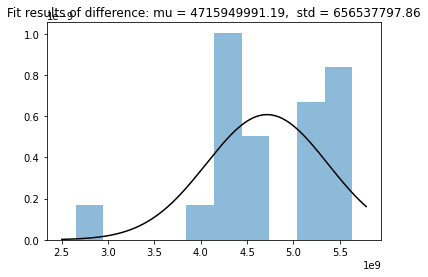

In [38]:
plot_hist(real_A["a280_1"] - real_B["a280_1"], "difference")

### t-Test for two paired samples

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

**Note**: Only the two-sided p-value is returned!

In [6]:
# Apply the statistical test
res = scipy.stats.ttest_rel(data_A, data_B)
pvalue = res.pvalue

# Compute the correct p-value (two-sided vs. one-sided)
pvalue = compute_pvalue(res.pvalue, np.mean(data_A) - np.mean(data_B), alternative)

# Print results
print_decision(pvalue, alpha)

Test Result:
p-value = 0.0344
H0 can be rejected on a level of significance of 0.05.


### Wilcoxon Test for two paired samples

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [46]:
for col in real_A.columns:
    col_A = real_A[col]
    col_B = real_B[col]
    # Apply the statistical test
    res = scipy.stats.wilcoxon(col_A, col_B, alternative = alternative)

    print("---------")
    print(col)
    # Print results
    print_decision(res.pvalue, alpha)
    
    avg_A = sum(col_A) / len(col_A)
    avg_B = sum(col_B) / len(col_B)
    
    if avg_A > avg_B:
        print("A better than B")
        # ACO better than GA
    else:
        print("B better than A")
        # GA better than ACO

---------
test
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
A better than B
---------
a280_1
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
A better than B
---------
rc101_1
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
A better than B
---------
rc101_2
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
B better than A
---------
pr8_2
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
A better than B
---------
berlin52_1
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
B better than A
---------
pr8_1
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
B better than A


## Tests for independent samples

Use this section if you have **two independent samples**.

### Visualisation of the distribution of both groups

We check, whether both samples ```data_A - data_B``` are (approximately) normally distributed.
This can be done by plotting a **histogram** for each group.
Furthermore we plot the **density of an estimated normal distribution** 
If the curves approximately follows the corresponding histogram, then normal distribution can be assumed.

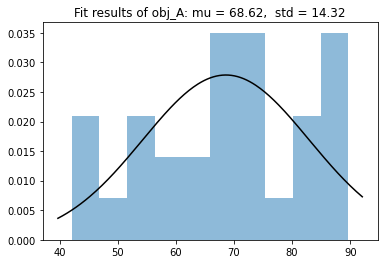

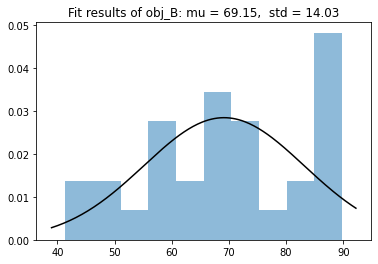

In [8]:
plot_hist(data_A, name_A)
plot_hist(data_B, name_B)

### t-Test for two independent samples

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

**Note**: Only the two-sided p-value is returned!

In [9]:
# Apply the statistical test
res = scipy.stats.ttest_ind(data_A, data_B)
pvalue = res.pvalue

# Compute the correct p-value (two-sided vs. one-sided)
pvalue = compute_pvalue(res.pvalue, np.mean(data_A) - np.mean(data_B), alternative)

# Print results
print_decision(pvalue, alpha)

Test Result:
p-value = 0.8873
H0 cannot be rejected on a level of significance of 0.05.


### U-Test for two independent samples

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [45]:
for col in real_A.columns:
    col_A = real_A[col]
    col_B = real_B[col]
    # Apply the statistical test
    res = scipy.stats.mannwhitneyu(col_A, col_B, alternative = alternative)

    # Print results
    print_decision(res.pvalue, alpha)

Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
Test Result:
p-value = 0.0000
H0 can be rejected on a level of significance of 0.05.
